## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

## Configurations

In [2]:
# path for training and testing data
train_data_path = 'C:/Users/ansar/Desktop/Workspace/Personal/MLOPs/Customer Churn Prediction/api/src/notebooks/data/train_processed.csv'
test_data_path = 'C:/Users/ansar/Desktop/Workspace/Personal/MLOPs/Customer Churn Prediction/api/src/notebooks/data/test_processed.csv'
SEED = 42

In [3]:
# loading the training and testing datasets
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

In [4]:
# separating the independent and dependent features
X_train = df_train.drop('Churn', axis=1)
y_train = df_train['Churn']

X_test = df_test.drop('Churn', axis=1)
y_test = df_test['Churn']

In [5]:
# resampling for class imbalance
smote = SMOTE(random_state=SEED)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [6]:
# helper function for plotting ROC curve
def plot_roc(classifier, fpr, tpr, auc_score):
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{classifier} (AUC={auc_score:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.grid(True, alpha=0.3)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC curve for {classifier}')
    plt.legend()
    plt.show()

### Evaluating Logistic Regression

In [7]:
logistic_regression_params = {
    'solver': 'sag', 
    'C': 0.30488401774858853, 
    'max_iter': 1311, 
    'tol': 0.07272504817997558, 
    'class_weight': None, 
    'fit_intercept': True, 
    'intercept_scaling': 0.2339737361256624
}

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.53      0.81      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.81      0.76      0.77      1409



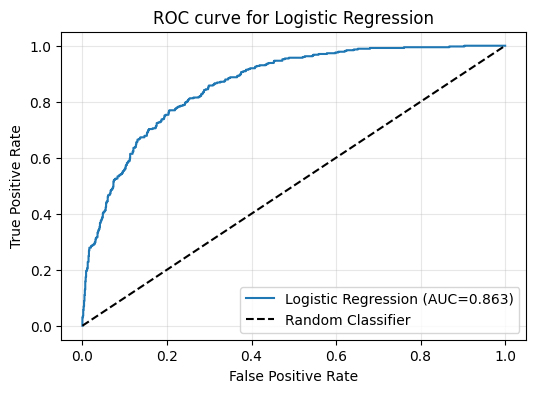

In [8]:
logistic_regression = LogisticRegression(**logistic_regression_params, random_state=SEED)
logistic_regression.fit(X_train_resampled, y_train_resampled)

y_pred = logistic_regression.predict(X_test)
print(classification_report(y_test, y_pred))

# plotting ROC curve
y_prob = logistic_regression.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plot_roc('Logistic Regression', fpr, tpr, auc_score)

### Evaluating Support Vector Classifier

In [9]:
svc_params = {
    'kernel': 'sigmoid', 
    'C': 99.02844274244312, 
    'gamma': 'scale', 
    'class_weight': 'balanced', 
    'coef0': 5.929050096703457
}

              precision    recall  f1-score   support

           0       0.97      0.46      0.62      1036
           1       0.39      0.96      0.56       373

    accuracy                           0.59      1409
   macro avg       0.68      0.71      0.59      1409
weighted avg       0.82      0.59      0.61      1409



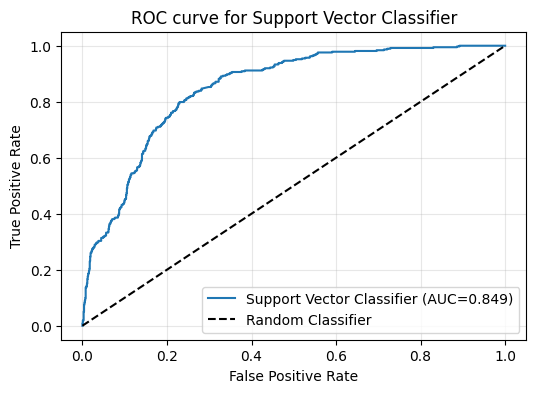

In [10]:
svc = SVC(**svc_params, probability=True, random_state=SEED)
svc.fit(X_train_resampled, y_train_resampled)

y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

# plotting ROC curve
y_prob = svc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plot_roc('Support Vector Classifier', fpr, tpr, auc_score)